# Метод штрафов. ADMM (10 баллов)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

__Задача 1.__ Рассмотрим задачу оптимизации SVM:

$$
\min_{x \in \mathbb{R}^d} \frac{1}{2} \|x\|_2^2 + C \sum_{i = 1}^n \max \left(1 - b_i \cdot \langle a_i, x \rangle, 0 \right).
$$

__a) (1 балл)__ Переформулируйте задачу в задачу оптимизации с ограничениями.

_Подсказка: попробуйте представить слагаемое в сумме как $s = Bx + e$. Для удобства обозначений также замените суммирование на функцию:_

$$
p(y) = \sum_{i = 1}^n \max(y_i, 0).
$$

In [9]:
# Ваше решение (Markdown)

Обозначим матрицу $B \in R^{nxd}$ и вектор e ∈ R^n так:
$B_i = - b_i a_i^T,  e = (1,…,1)^T$ Тогда
$(Bx + e)_i = -b_i ⟨a_i, x⟩ + 1 = 1 - b_i ⟨a_i, x⟩$

Введём функцию
$p(y) = ∑_{i=1}^n max(y_i, 0)$

=> исходная SVM
$min_{x \in R^d}  1/2 ||x||_2^2 + C p(Bx + e)$

Для одного скаляра t:
$max(t,0) = min_s { s | s ≥ t, s ≥ 0 }$
из условий s ≥ t и s ≥ 0 следует s ≥ max(t,0),
поэтому минимум по s не меньше max(t,0)
при этом при выборе $s* = max(t,0)$ оба неравенства выполняются и значение цели равно max(t,0)

покомпонентно к вектору y, получаем:
$p(y) = ∑_{i=1}^n max(y_i,0)= ∑_{i=1}^n min_{s_i} { s_i | s_i ≥ y_i, s_i ≥ 0 } =$
$= min_{s ∈ R^n} { ∑_{i=1}^n s_i | s ≥ y, s ≥ 0 }$

Подставляя y = Bx + e, получаем эквивалентную задачу оптимизации с ограничениями:
$min_{x ∈ R^d, s ∈ R^n}  1/2 ||x||_2^2 + C ∑_{i=1}^n s_i$
при ограничениях
$s \geq Bx + e,   s ≥ 0$

То есть эквивалентная задача:
$min_{x,s} 1/2 ||x||_2^2 + C 1^T s$
при
$s ≥ Bx + e, s ≥ 0$


__б) (1 балл)__ Для полученной задачи оптимизации с ограничениями напишите функцию Лагранжа $\mathcal{L}(x, y, \lambda)$.

In [ ]:
# Ваше решение (Markdown)

Для полученной задачи оптимизации с ограничениями
$\min_{x \in \mathbb{R}^d,\, y \in \mathbb{R}^n} \frac12 \|x\|_2^2 + C \mathbf{1}^T y$ при $y \ge Bx + e,\quad y \ge 0$ <br>

перепишем ограничения в виде <br>
$g^{(1)}(x, y) = Bx + e - y \le 0,\quad g^{(2)}(x, y) = -y \le 0$ <br>
Введём множители Лагранжа $\lambda^{(1)}, \lambda^{(2)} \in \mathbb{R}_+^n$ и обозначим <br>
$\lambda = (\lambda^{(1)}, \lambda^{(2)})$ <br>

Тогда функция Лагранжа имеет вид <br>
$L(x, y, \lambda)= \frac12 \|x\|_2^2 + C \mathbf{1}^T y+ (\lambda^{(1)})^T (Bx + e - y)+ (\lambda^{(2)})^T (-y)$ <br>


__в) (1 балл)__ Запишите Лагранжиан аугментированной задачи $\mathcal{L}_{\rho}(x, s, \lambda)$.

In [ ]:
# Ваше решение (Markdown)

Для задачи <br>
$min_{x \in R^d, s \in R^n} \frac{1}{2} ||x||_2^2 + C \mathbf{1}^T s$ <br>
при ограничениях <br>
$s \ge Bx + e, s \ge 0$ <br>

Огр. в виде функций <br>
$g^{(1)}(x,s) = Bx+e-s \le 0$, $g^{(2)}(x,s) = -s \le 0$. <br>
Введём множители Лагранжа $\lambda^{(1)}, \lambda^{(2)} \in R_+^n$. <br>

=> аугм. Лагранжиан при $\rho > 0$: <br>
$L_\rho(x,s,\lambda^{(1)},\lambda^{(2)}) = \frac12 ||x||_2^2 + C \mathbf{1}^T s
+ (\lambda^{(1)})^T (Bx + e - s)
+ (\lambda^{(2)})^T (-s)
+ \frac{\rho}{2}\left( ||Bx + e - s||_2^2 + ||s||_2^2 \right).$ <br>

Если обозначить $\lambda = (\lambda^{(1)}, \lambda^{(2)})$, то это и есть $L_\rho(x,s,\lambda)$. <br>


__г) (1 балл)__ Найдите $\arg \min\limits_{x \in \mathbb{R}^d} \mathcal{L}_{\rho}(x, y, \lambda)$.

In [ ]:
# Ваше решение (Markdown)

Ищем $arg \min_{x \in R^d} L_\rho(x, y, \lambda)$ <br>
Фиксируем $y, \lambda$, рассматриваем только слагаемые, зависящие от $x$: <br>
$L_\rho(x, y, \lambda) = \frac12 ||x||_2^2 + (\lambda^{(1)})^T Bx + \frac{\rho}{2} ||Bx + e - y||_2^2 + const(y,\lambda)$ <br>

Вычислим градиент по $x$: <br>
$\nabla_x (\frac{1}{2} ||x||_2^2) = x$ <br>
$\nabla_x ((\lambda^{(1)})^T Bx) = B^T \lambda^{(1)}$ <br>
$\nabla_x (\frac{\rho}{2} ||Bx + e - y||_2^2) = \rho B^T (Bx + e - y)$ <br>

Тогда <br>
$\nabla_x L_\rho(x, y, \lambda) = x + B^T \lambda^{(1)} + \rho B^T (Bx + e - y)$ <br>
Приравнивая к нулю: <br>
$x + B^T \lambda^{(1)} + \rho B^T (Bx + e - y) = 0$ <br>

по $x$: <br>
$(I + \rho B^T B) x = - B^T \lambda^{(1)} - \rho B^T (e - y)$ <br>

матрица $I + \rho B^T B$ симметрична и пол. определена => решение единственно: <br>
$x_\rho^*(y,\lambda) = - (I + \rho B^T B)^{-1} ( B^T \lambda^{(1)} + \rho B^T (e - y) )$ <br>

=> <br>
$arg \min_{x \in R^d} L_\rho(x, y, \lambda) = x_\rho^*(y,\lambda)$, <br>
где <br>
$x_\rho^*(y,\lambda) = - (I + \rho B^T B)^{-1} ( B^T \lambda^{(1)} + \rho B^T (e - y) )$ <br>


__д) (3 балл)__ Найдите $\arg \min\limits_{y \in \mathbb{R}^n} \mathcal{L}_{\rho}(x, y, \lambda)$.

In [ ]:
# Ваше решение (Markdown)

Фикс. $x, \lambda$ и только слаг. зависящие от $y$: <br>
$L_\rho(x, y, \lambda^{(1)}, \lambda^{(2)}) =$ <br>
$= \frac12 ||x||_2^2 + C \mathbf{1}^T y + (\lambda^{(1)})^T (Bx + e - y) + (\lambda^{(2)})^T (-y) + \frac{\rho}{2} ( ||Bx + e - y||_2^2 + ||y||_2^2 )$ <br>
Здесь $\lambda = (\lambda^{(1)}, \lambda^{(2)})$ <br>

Отбросив константы по $y$, по координатам. Пусть <br>
$a_i = (Bx + e)_i$, $\lambda^{(1)}_i, \lambda^{(2)}_i$ - $i$-е координаты. Тогда для фиксированного $i$: <br>
$\varphi_i(y_i) = (C - \lambda^{(1)}_i - \lambda^{(2)}_i) y_i + \frac{\rho}{2}[(a_i - y_i)^2 + y_i^2] + const$ <br>

$(a_i - y_i)^2 + y_i^2 = a_i^2 - 2 a_i y_i + 2 y_i^2$. <br>
Тогда <br>
$\varphi_i(y_i) = (C - \lambda^{(1)}_i - \lambda^{(2)}_i) y_i + \frac{\rho}{2}(a_i^2 - 2 a_i y_i + 2 y_i^2) + const$ <br>
$= \rho y_i^2 + (C - \lambda^{(1)}_i - \lambda^{(2)}_i - \rho a_i) y_i + const$ <br>

Производная по $y_i$ =0: <br>
$\varphi_i'(y_i) = 2 \rho y_i + (C - \lambda^{(1)}_i - \lambda^{(2)}_i - \rho a_i) = 0$ <br>



=> <br>
$y_i^*(x,\lambda) = \frac{\rho a_i - C + \lambda^{(1)}_i + \lambda^{(2)}_i}{2 \rho}$ <br>

$a = Bx + e$: => <br>
$y_\rho^*(x,\lambda) = \frac{1}{2 \rho}( \rho (Bx + e) - C \mathbf{1} + \lambda^{(1)} + \lambda^{(2)})$ <br>

=> <br>
$arg \min_{y \in R^n} L_\rho(x, y, \lambda) = y_\rho^*(x,\lambda)$, <br>
где <br>
$y_\rho^*(x,\lambda) = \frac{1}{2 \rho}( \rho (Bx + e) - C \mathbf{1} + \lambda^{(1)} + \lambda^{(2)} )$ <br>


__е) (3 балла)__ Реализуйте метод ADMM.

**Псевдокод алгоритма**

---

_Инициализация:_

- Начальная точка $y^0 \in \mathbb{R}^n$
- Начальная точка $\lambda^0 \in \mathbb{R}^n$
- Начальный параметр штрафа $\rho \in \mathbb{R}$
- Максимальное число итераций $K$.

---

$k$_-ая итерация_:

1. Посчитайте обновление $x$:

$$
x^{k + 1} = \arg \min_{x \in \mathbb{R}^d} \mathcal{L}_{\rho} (x, y^k, \lambda^k)
$$

2. Посчитайте обновление $y$:

$$
y^{k + 1} = \arg \min_{y \in \mathbb{R}^n} \mathcal{L}_{\rho} (x^{k + 1}, y, \lambda^k)
$$

3. Посчитайте обновление $\lambda$:

$$
\lambda^{k + 1} = \lambda^k + \rho (-Bx^{k + 1} + y^{k + 1} - e)
$$


---

_Условие остановки:_
- Достигнуто максимальное число итераций $K$ или $f\left(x^k\right) < \varepsilon$

---

_Выход:_
- Полученное значение $\sum\limits_{k = 0}^K x^k$

В качестве дата-матрицы $A$ и целевого вектора $b$ рассмотрим данные из датасета [_mushrooms_](https://github.com/BRAIn-Lab-teaching/OPTIMIZATION-METHODS-COURSE/blob/ПМИ_осень_2025/Datasets/mushrooms.txt). Ниже представлена функция загрузки датасета.

In [4]:
from sklearn.datasets import load_svmlight_file

#файл должен лежать в той же директории, что и notebook
dataset = "mushrooms.txt"

data = load_svmlight_file(dataset)
A, b = data[0].toarray(), data[1]

b = 2 * b - 3

C помощью функции ```train_test_split``` разделите датасет в отношении 4 к 1 (обучающая выборка должна быть в 4 раза больше, чем тестовая). Поставьте параметр ```random_state = 57```. В дальнейшем мы будем валидировать процесс обучения на тестовой выборке.

In [13]:
# Ваше решение (Code)
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=57)

Дополните функцию потерь.

In [21]:
def criterion(A_train, b_train, x, C=1):
    """
    Вычисляет loss.

    Параметры:
        A_train (np.array): Матрица признаков
        b_train (np.array): Вектор меток
        x (np.array): Вектор параметров
        C (float): Коэффициент регуляризации

    Возвращает:
        loss (float): Значение функции потерь
    """





    # YOUR CODE HERE
    margins = b_train * (A_train @ x)
    hinge = np.maximum(0, 1 - margins)
    loss = 0.5 * np.dot(x, x) + C * hinge.sum()




    return loss

Допишите `ADMM`.

In [26]:
def ADMM(A, b, criterion, x_0, y_0, lambda_0, eps=1e-8, max_iter=100, **params):
    """
    Реализация ADMM.

    Параметры:
        A (np.array): Матрица признаков
        b (np.array): Вектор меток
        criterion (Callable): Функция критерия остановки
        x_0 (np.array): Начальная точка
        y_0 (np.array): Начальная точка
        lambda_0 (np.array): Начальная точка
        eps (float): Точность сходимости (критерий остановки)
        max_iter (int): Максимальное количество итераций
        params : Именованные гиперпараметры метода
            params['C']: Параметр регуляризации
            params['rho']: Параметр штрафа

    Возвращает:
        x_k (np.array): Найденное решение
        values (list): Список значений x_k на каждой итерации
        errors (list): Список значений критерия сходимости на каждой итерации
    """

    values = []
    errors = []

    x_k = np.copy(x_0)
    y_k = np.copy(y_0)
    lmbda_k = np.copy(lambda_0)

    values.append(x_k)
    errors.append(criterion(A, b, x_k, params['C']))






    # YOUR CODE HERE

    rho= params['rho']
    c= params['C']

    B= -(b[:, None]*A)
    e= np.ones_like(b)

    Bt= B.T
    d= A.shape[1]
    G= np.eye(d)+ rho*(Bt @ B)
    G_inv= np.linalg.inv(G)

















    for k in range(max_iter):








        # YOUR CODE HERE


        rhs= Bt@(lmbda_k+rho*(y_k-e))
        x_k= G_inv@rhs

        d_vec= B@x_k+e
        y_tmp= d_vec-(lmbda_k+c)/rho
        y_k= np.maximum(y_tmp, 0.0)

        lmbda_k= lmbda_k+rho*(-B@x_k+y_k-e)










        values.append(x_k)
        errors.append(criterion(A, b, x_k, params['C']))

        if errors[-1] < eps:
            break

    return np.mean(np.array(values)), values, errors

Запустите ADMM для $C =$ `1e-6`, `1e-4`, `1e-2`.

In [28]:
# Ваше решение (Code)
Cs = [1e-6, 1e-4, 1e-2]
rho = 1.0
eps = 1e-6
max_iter = 1000

results_admm = {}

for C in Cs:
    x_0 = np.zeros(A_train.shape[1])
    y_0 = np.zeros(A_train.shape[0])
    lambda_0 = np.zeros(A_train.shape[0])

    x_star, values, errors = ADMM(
        A_train, b_train, criterion,
        x_0, y_0, lambda_0,
        eps=eps,
        max_iter=max_iter,
        C=C,
        rho=rho
    )

    results_admm[C] = (x_star, values, errors)
    print("C=", C, "iters=", len(errors), "final loss=", errors[-1])








C= 1e-06 iters= 1001 final loss= 0.21872357466940434
C= 0.0001 iters= 1001 final loss= 0.46067534433424945
C= 0.01 iters= 1001 final loss= 4.652465054953172


Постройте графики сходимости ошибки.

In [ ]:
# Ваше решение (Code)

In [31]:
import matplotlib.pyplot as plt

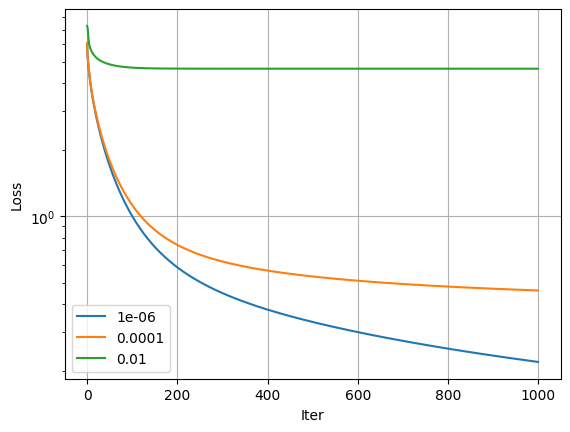

In [44]:
for C, (i, j, errors) in results_admm.items():
    plt.plot(range(len(errors)-1), errors[1:len(errors)], label=str(C))

plt.xlabel('Iter')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid()
plt.legend()

Постройте график accuracy.

In [ ]:
# Ваше решение (Code)

C= 1e-06 accuracy= 0.9606153846153846
C= 0.0001 accuracy= 0.968
C= 0.01 accuracy= 0.984


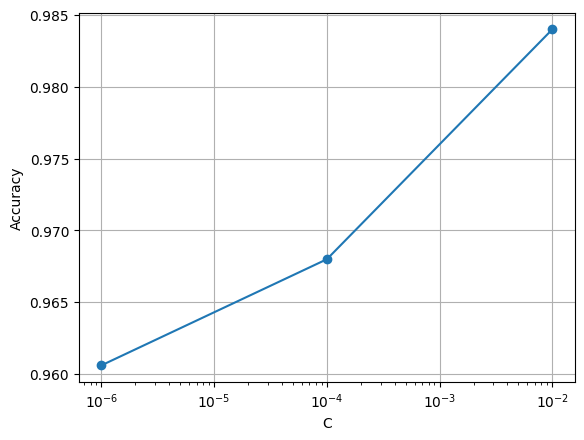

In [56]:
accuracies = []

for C in Cs:

    x_star, values, errors = results_admm[C]
    w= values[-1]

    y_pred= np.sign(A_test @ w)
    y_pred[y_pred== 0]=1


    acc= (y_pred==b_test).mean()
    accuracies.append(acc)

    print("C=", C, "accuracy=", acc)

plt.plot(Cs, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
